# Binary Classification

Source: https://github.com/logictensornetworks/logictensornetworks/blob/master/examples/binary_classification/binary_classification.ipynb

Modified by Erik Mayer:
+ 6/17/2024: To work on Google Colab, added !pip install...
+ 6/20/2024: See below
+ 6/21/2024: Specifying array values

This is a basic example in which we learn to ground unary predicate $A$ that is defined in the space of $[0,1]^2$.

We define the predicate $A$ to apply to points that are close to the middle point $c=(.5,.5)$.In order to get training data, we randomly sample data from the domain. We split the sample data into two separate sets based on their euclidian distance to $c$. We then define two facts for the predicate $A$. For all points the predicate should apply to, we provide them as positive examples and vice versa for all points that the predicate does not apply to.

To add a local copy of the LogicTensorNetworks repository into your Colab environment, use the following command:

In [1]:
!pip install git+https://github.com/logictensornetworks/logictensornetworks

  Cloning https://github.com/logictensornetworks/logictensornetworks to /tmp/pip-req-build-zwgktrj8
  Running command git clone --filter=blob:none --quiet https://github.com/logictensornetworks/logictensornetworks /tmp/pip-req-build-zwgktrj8
  Resolved https://github.com/logictensornetworks/logictensornetworks to commit d62d101f90be8ec029de90cb1db5df01c2c58d72
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ltn: filename=ltn-2.1-py3-none-any.whl size=13028 sha256=a455422bed39fefcade076b2b6e2320b0482bd8c95ea94d812c2d0b6c6900716
  Stored in directory: /tmp/pip-ephem-wheel-cache-ncim3lw9/wheels/85/92/5c/138f4ade7bf608ca2b334e77af7af507a4e60bcb33b088f529
Successfully built ltn


In [2]:
import logging; logging.basicConfig(level=logging.INFO)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import ltn

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

Sample random data from $[0,1]^2$. Our groundtruth positive training data for $A$ is close to the center (.5,.5). All other data is considered as negative examples.

# E.M. modifications 6/20/2024

Added second set of data named data_b which had larger radius than original data and then appended data_b to data. This is simulating the orignal data being OP-13 data and data_b being Aurorasaurus data.

[[0.5 0.5]
 [0.6 0.6]
 [0.4 0.4]
 [0.3 0.3]
 [0.2 0.2]
 [0.1 0.1]]
[ True  True  True  True False False]


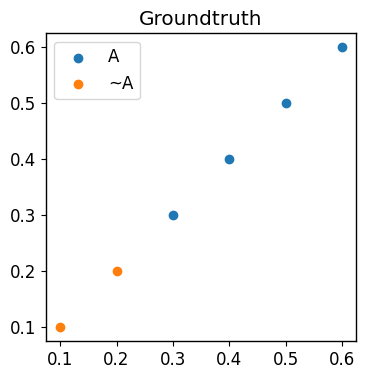

[[0.55 0.55]
 [0.65 0.65]
 [0.45 0.45]
 [0.35 0.35]
 [0.25 0.25]
 [0.15 0.15]]
[ True  True  True  True  True False]


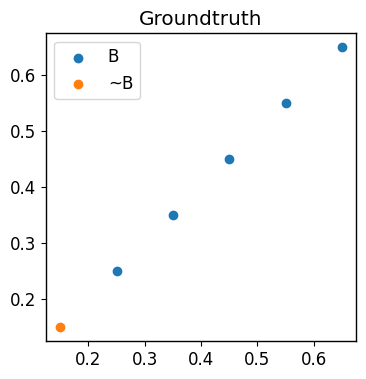

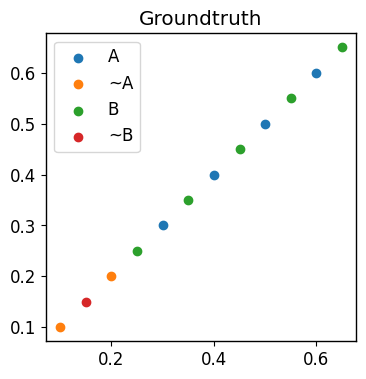

[[0.5  0.5 ]
 [0.6  0.6 ]
 [0.4  0.4 ]
 [0.3  0.3 ]
 [0.2  0.2 ]
 [0.1  0.1 ]
 [0.55 0.55]
 [0.65 0.65]
 [0.45 0.45]
 [0.35 0.35]
 [0.25 0.25]
 [0.15 0.15]]
[ True  True  True  True False False  True  True  True  True  True False]
<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.bool, name=None))>


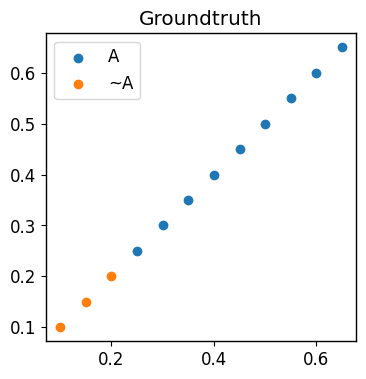

In [15]:
batch_size=64
nr_samples = 12 # previously 100
half_nr_samples = 6
nr_samples_train = 8 # previously 50 E.M. - Why no nr_samples_test ?
# data = np.random.uniform([0,0],[1,1],(half_nr_samples,2))
data    = np.array([[0.5,0.5],[0.6,0.6],[0.4,0.4],[0.3,0.3],[0.2,0.2],[0.1,0.1]],  dtype=float)
print(data) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
labels = np.sum(np.square(data-[.5,.5]),axis=1)<.09
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels) # Added E.M.

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

# data_b = np.random.uniform([0,0],[1,1],(half_nr_samples,2))
data_b    = np.array([[0.55,0.55],[0.65,0.65],[0.45,0.45],[0.35,0.35],[0.25,0.25],[0.15,0.15]],  dtype=float)
print(data_b) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
labels_b = np.sum(np.square(data_b-[.5,.5]),axis=1)<.16
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels_b) # Added E.M.

plt.figure(figsize=(4,4))
#plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
#plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

data = np.concatenate((data, data_b))
labels = np.concatenate((labels, labels_b))

print(data)
print(labels)

# Below comment doesn't seem to match program
# 400 examples for training; 100 examples for training
ds_train = tf.data.Dataset\
        .from_tensor_slices((data[:nr_samples_train],labels[:nr_samples_train]))\
        .batch(batch_size)
print (ds_train) # Added E. M
ds_test = tf.data.Dataset\
        .from_tensor_slices((data[nr_samples_train:],labels[nr_samples_train:]))\
        .batch(batch_size)
print (ds_test) # Added E. M
plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')



plt.title("Groundtruth")
plt.legend()
plt.show()


Define the predicate $A$. $A$ has arity 1 (single argument). The dimension of the argument is 2 (since the domain is $[0,1]^2$).

In [16]:
A = ltn.Predicate.MLP([2],hidden_layer_sizes=(16,16))

Import some operators to write the axioms.

In [17]:
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach())
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=2),semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=2),semantics="exists")

Now we add some facts to the knowledgebase. We express that for all points in $\mathrm{data\_A}$, $A$ should be true. For all points in $\mathrm{data\_not\_A}$, $A$ is not true.

In [18]:
formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError(p=2))

@tf.function
def axioms(data, labels):
    x_A = ltn.Variable("x_A",data[labels])
    x_not_A = ltn.Variable("x_not_A",data[tf.logical_not(labels)])
   # x_B = ltn.Variable("x_B",data_b[labels_b])
   # x_not_B = ltn.Variable("x_not_B",data_b[tf.logical_not(labels_b)])
    axioms = [
        Forall(x_A, A(x_A)),
        Forall(x_not_A, Not(A(x_not_A)))
    ]
    sat_level = formula_aggregator(axioms).tensor
    return sat_level

Initialize all layers and the static graph.

In [19]:
for _data, _labels in ds_test:
    print("Initial sat level %.5f"%axioms(_data, _labels))
    break


Initial sat level 0.51044


Train on the knowledgebase.

In [20]:
mean_metrics = tf.keras.metrics.Mean()

trainable_variables = A.trainable_variables
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
for epoch in range(2000):
    for _data, _labels in ds_train:
        with tf.GradientTape() as tape:
            loss = 1. - axioms(_data, _labels)
        grads = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
    if epoch%100 == 0:
        mean_metrics.reset_states()
        for _data, _labels in ds_test:
            mean_metrics(axioms(_data, _labels))
        print("Epoch %d: Sat Level %.3f"%(epoch, mean_metrics.result() ))
mean_metrics.reset_states()
for _data, _labels in ds_test:
    mean_metrics(axioms(_data, _labels))
print("Training finished at Epoch %d with Sat Level %.3f"%(epoch, mean_metrics.result() ))

Epoch 0: Sat Level 0.511
Epoch 100: Sat Level 0.640
Epoch 200: Sat Level 0.736
Epoch 300: Sat Level 0.763
Epoch 400: Sat Level 0.770
Epoch 500: Sat Level 0.773
Epoch 600: Sat Level 0.775
Epoch 700: Sat Level 0.777
Epoch 800: Sat Level 0.778
Epoch 900: Sat Level 0.779
Epoch 1000: Sat Level 0.779
Epoch 1100: Sat Level 0.780
Epoch 1200: Sat Level 0.780
Epoch 1300: Sat Level 0.781
Epoch 1400: Sat Level 0.781
Epoch 1500: Sat Level 0.781
Epoch 1600: Sat Level 0.782
Epoch 1700: Sat Level 0.782
Epoch 1800: Sat Level 0.782
Epoch 1900: Sat Level 0.782
Training finished at Epoch 1999 with Sat Level 0.782


The following queries the database on training data and test data. Vizualisation show the extent of generalization.

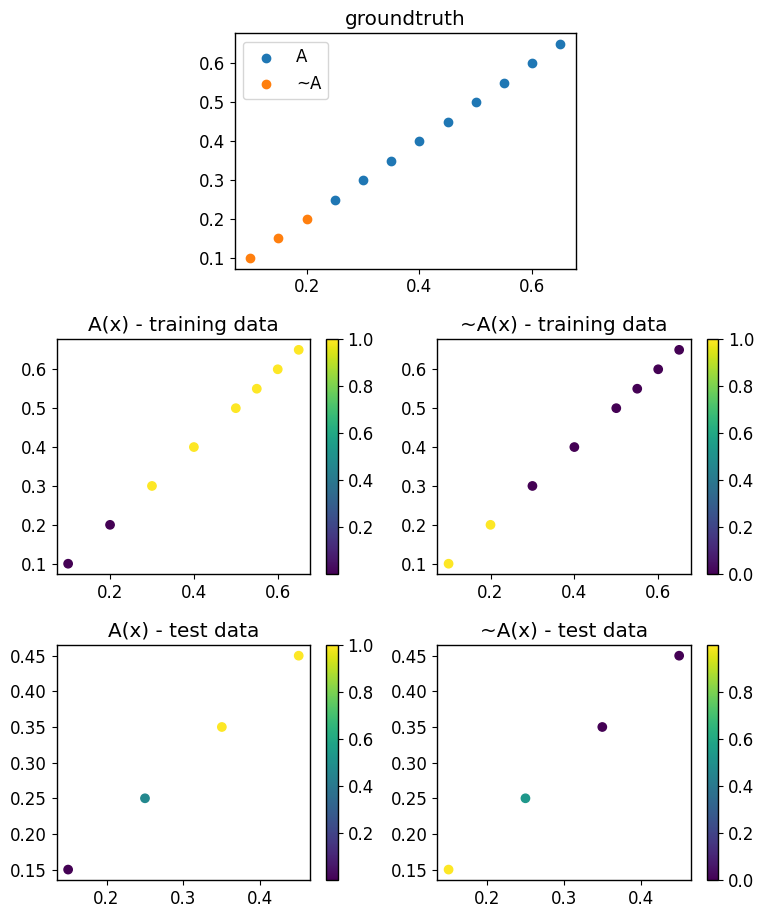

In [21]:
fig = plt.figure(figsize=(9, 11))

plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = plt.subplot2grid((3,8),(0,2),colspan=4)
ax.set_title("groundtruth")
ax.scatter(data[labels][:,0],data[labels][:,1],label='A')
ax.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')
ax.legend()

# Training data
x = ltn.Variable("x",data[:nr_samples_train])
fig.add_subplot(3, 2, 3)
result=A(x)
plt.title("A(x) - training data")
plt.scatter(data[:nr_samples_train,0],data[:nr_samples_train,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 4)
result=Not(A(x))
plt.title("~A(x) - training data")
plt.scatter(data[:nr_samples_train,0],data[:nr_samples_train,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

# Test data
x = ltn.Variable("x",data[nr_samples_train:])
fig.add_subplot(3, 2, 5)

result=A(x)
plt.title("A(x) - test data")
plt.scatter(data[nr_samples_train:,0],data[nr_samples_train:,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 6)
result=Not(A(x))
plt.title("~A(x) - test data")
plt.scatter(data[nr_samples_train:,0],data[nr_samples_train:,1],c=result.tensor.numpy().squeeze())
plt.colorbar()
plt.savefig("ex_binary_testing.pdf")
plt.show()